In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

%precision 2
np.set_printoptions(precision=2)

np.random.seed(123)

In [2]:
tips = sns.load_dataset('tips')
X_tips = tips[['total_bill','size']]
y_tips = tips.tip
X_tips.shape, y_tips.shape

((244, 2), (244,))

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_tips,y_tips,random_state=123)

In [6]:
X_tips.shape, y_tips.shape

((244, 2), (244,))

In [7]:
X_train.shape, X_test.shape

((183, 2), (61, 2))

In [8]:
y_train.shape,y_test.shape

((183,), (61,))

In [9]:
X_test.shape[0]/X_tips.shape[0]

0.25

In [10]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor().fit(X_train,y_train)

In [11]:
dummy_reg.predict([[0,0],[1,1]])

array([2.99, 2.99])

In [12]:
y_train.mean()

2.9879781420765026

In [13]:
print(f'{dummy_reg.score(X_test,y_test):0.2f}')

-0.00


In [14]:
y_hat = dummy_reg.predict(X_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_test,y_hat)

-0.001154933013596926

In [17]:
def adj_r2_score(r2,num_items,num_parameters):
    return 1 - (1-r2)*num_items/(num_items-num_parameters-1)

In [18]:
adj_r2_score(r2_score(y_test,y_hat),*X_test.shape)

-0.05293880885912783

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y_test,y_hat)

1.4715838334975666

In [21]:
def rmse(mse):
    return np.sqrt(mse)

In [22]:
rmse(mean_squared_error(y_test,y_hat))

1.2130885513834373

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linr = LinearRegression().fit(X_train,y_train)

In [25]:
linr.score(X_test,y_test)

0.4697819853335495

In [26]:
adj_r2_score(linr.score(X_test,y_test),*X_test.shape)

0.4423569156094227

In [27]:
rmse(mean_squared_error(y_test,linr.predict(X_test)))

0.8828137684958168

In [28]:
linr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
X_train.iloc[:,0].shape

(183,)

In [30]:
X_train.iloc[:,0].values.reshape(-1,1).shape

(183, 1)

---

In [31]:
from sklearn.model_selection import cross_val_score

In [320]:
scores = cross_val_score(linr, X_tips, y_tips, cv=5)
scores

array([0.53, 0.61, 0.51, 0.25, 0.42])

In [321]:
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.465733781303872 +- 0.2449561533572589


In [314]:
scores = cross_val_score(linr, X_tips, y_tips, cv=5, scoring='neg_mean_squared_error')
-scores

array([0.78, 0.63, 0.72, 1.78, 1.31])

In [315]:
print(f'{np.mean(-scores)} +- {2*np.std(scores)}')

1.0434556136475241 +- 0.875710110820377


In [316]:
from sklearn.linear_model import Lasso

In [317]:
lasso = Lasso(alpha=1.0)

In [318]:
scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
-scores

array([2.11, 0.99, 1.  , 0.73, 1.18])

In [319]:
print(f'{np.mean(-scores)} +- {2*np.std(scores)}')

1.201674909794199 +- 0.9549587839640695


In [345]:
mean_scores = []
for alpha in [.01, .1, .5, .9, .99, 1]:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    mean_scores.append( (alpha,-np.mean(scores)) )

In [339]:
mean_scores

[(0, 1.1682388367221601),
 (0.01, 1.1701318672271284),
 (0.10, 1.1765478759677261),
 (0.50, 1.1848065753769408),
 (0.90, 1.197713823254667),
 (0.99, 1.201265584197984),
 (1, 1.201674909794199)]

In [340]:
sorted(mean_scores,key=lambda x:x[1])[0]

(0, 1.1682388367221601)

In [336]:
scores = cross_val_score(Lasso(alpha=0.01), X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [337]:
print(f'{np.mean(-scores)} +- {2*np.std(scores)}')

1.1701318672271284 +- 0.7421894080363912


In [292]:
from sklearn.linear_model import LassoCV

In [346]:
lassocv = LassoCV(alphas=[.01, .1, .5, .9, .99, 1],cv=5).fit(X_train,y_train)

In [343]:
lassocv.alpha_

0.01

In [306]:
lassocv.alphas_

array([1.  , 0.99, 0.9 , 0.5 , 0.1 , 0.01, 0.  ])

In [305]:
lassocv.mse_path_

array([[2.11, 0.99, 1.  , 0.73, 1.18],
       [2.11, 0.99, 1.  , 0.73, 1.18],
       [2.09, 0.99, 1.  , 0.73, 1.17],
       [2.01, 1.  , 1.03, 0.73, 1.16],
       [1.94, 0.99, 1.09, 0.73, 1.13],
       [1.85, 0.99, 1.13, 0.74, 1.13],
       [1.84, 1.  , 1.14, 0.74, 1.13]])

In [380]:
from sklearn.tree import DecisionTreeRegressor

In [381]:
from sklearn.model_selection import validation_curve

In [429]:
from sklearn.model_selection import validation_curve

depths = np.arange(1,15)
train_scores,test_scores = validation_curve(DecisionTreeRegressor(),
                                            X_train, y_train,
                                            'max_depth',
                                            depths,
                                            cv=5,
                                            scoring='r2'
                                           )
mean_train_scores = np.mean(train_scores,1)
mean_test_scores = np.mean(test_scores,1)

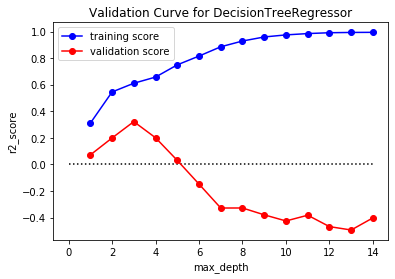

In [435]:
plt.plot(depth, mean_train_scores, 'o-', color='b',label='training score');
plt.plot(depth, mean_test_scores, 'o-', color='r', label='validation score');
plt.xlabel('max_depth'), plt.ylabel('r2_score');
plt.title('Validation Curve for DecisionTreeRegressor');
plt.hlines(0,0,14,ls=':'); plt.legend(loc='best');

plt.savefig('../slides/eods-06-model-evaluation/images/validation_curve.png')

In [410]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators':[5,10,20],
          'max_depth': [3,5,10]}

gscv = GridSearchCV(RandomForestRegressor(),params,cv=3,
                    scoring='neg_mean_squared_error')

gscv.fit(X_train,y_train)

print(gscv.best_params_)

{'max_depth': 3, 'n_estimators': 20}


In [409]:
scores = cross_val_score(gscv.best_estimator_,X_train,y_train,cv=5,
                         scoring='neg_mean_squared_error')
print(f'{np.mean(-scores)} +- {2*np.std(scores)}')

1.3085839262911811 +- 1.1663778322511023


In [436]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores = learning_curve(gscv.best_estimator_,
                                                      X_train, y_train,
                                                      cv=5,
                                                      scoring='r2'
                                                     )
mean_train_scores = np.mean(train_scores,1)
mean_test_scores = np.mean(test_scores,1)

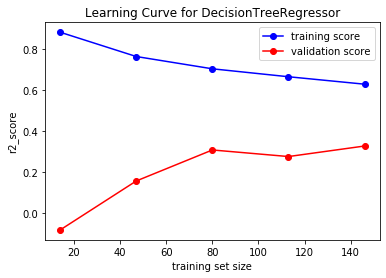

In [437]:
plt.plot(train_sizes, mean_train_scores, 'o-', color="b", label="training score");
plt.plot(train_sizes, mean_test_scores, 'o-', color="r", label="validation score")
plt.xlabel('training set size'), plt.ylabel('r2_score');
plt.title('Learning Curve for DecisionTreeRegressor');
plt.legend(loc="best");
plt.savefig('../slides/eods-06-model-evaluation/images/learning_curve.png')

---

In [4]:
wine = datasets.load_wine()
X_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
y_wine = wine.target

features_wine = wine.feature_names[3:5]
X_wine = X_wine.iloc[y_wine < 2,3:5].apply(lambda x: (x-x.mean())/x.std()).values
y_wine = y_wine[y_wine < 2]
X_wine.shape,y_wine.shape

((130, 2), (130,))

In [441]:
X_train,X_test,y_train,y_test = train_test_split(X_wine,y_wine,
                                                 stratify=y_wine,
                                                 test_size=.1,
                                                 random_state=123)

In [442]:
X_train.shape, X_test.shape

((117, 2), (13, 2))

In [443]:
y_train.shape, y_test.shape

((117,), (13,))

In [444]:
sum(y_train == 1) / len(y_train)

0.5470085470085471

In [446]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
dc.predict([[0,0]])

array([1])

In [447]:
scores = cross_val_score(dc,X_train,y_train,cv=5)

In [448]:
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.5471343873517787 +- 0.01831949364408387


In [449]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
scores = cross_val_score(knn,X_train,y_train,cv=5)
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.7954874835309619 +- 0.16935494362160694


In [450]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X_train,y_train)
scores = cross_val_score(logr,X_train,y_train,cv=5)
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.8216403162055336 +- 0.1285133830926686


/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_mod

In [549]:
# return predicted class probabilities
y_pred_logr = logr.predict_proba(X_train) 

y_pred_logr[:3,:]

array([[0.78, 0.22],
       [0.15, 0.85],
       [0.61, 0.39]])

In [470]:
tmp = np.concatenate([y_pred_logr[:,1].reshape([-1,1]),
                      y_train.reshape([-1,1])],axis=1)


In [497]:
tmp = np.transpose(np.vstack([y_pred_logr[:,1],y_train]))
tmp[:3]

array([[0.22, 0.  ],
       [0.85, 1.  ],
       [0.39, 0.  ]])

In [499]:
tmp = np.array(sorted(tmp,key=lambda x:x[0])[::-1])
tmp[:3]

array([[0.98, 1.  ],
       [0.97, 1.  ],
       [0.97, 1.  ]])

In [503]:
from sklearn.metrics import precision_recall_curve

In [504]:
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_logr[:,1])

In [507]:
thresholds[-10:]

array([0.93, 0.93, 0.94, 0.94, 0.95, 0.96, 0.97, 0.97, 0.97, 0.98])

In [ ]:
def plot_precision_recall(precision, recall,thresholds):
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    _ = ax[0].step(recall, precision,
             color='b', alpha=0.2, where='post')
    _ = ax[0].fill_between(recall, precision,
                     color='b', step='post', alpha=0.2)

    _ = ax[0].set_xlabel('Recall')
    _ = ax[0].set_ylabel('Precision')
    _ = ax[0].set_ylim([0.0, 1.05])
    _ = ax[0].set_xlim([0.0, 1.0])
    
    _ = ax[1].plot(thresholds,precision[:-1], label='precision')
    _ = ax[1].plot(thresholds,recall[1:],label='recall')
    _ = ax[1].legend()
    _ = ax[1].set_xlabel('threshold')
    _ = ax[1].set_ylabel('measure')

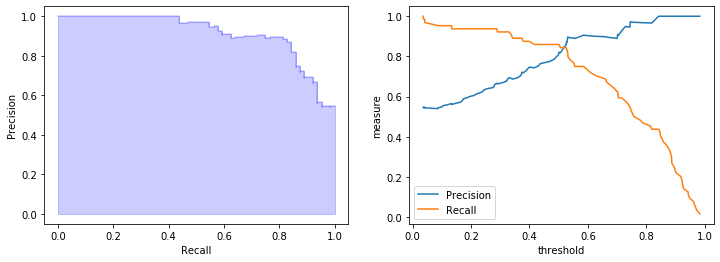

In [529]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].step(recall, precision, color='b', alpha=0.2, where='post');
ax[0].fill_between(recall, precision,color='b', step='post', alpha=0.2)
ax[0].set_xlabel('Recall');ax[0].set_ylabel('Precision');

ax[1].plot(thresholds,precision[:-1], label='Precision')
ax[1].plot(thresholds,recall[:-1],label='Recall')
ax[1].legend()
ax[1].set_xlabel('threshold');ax[1].set_ylabel('measure');

plt.savefig('../slides/eods-06-model-evaluation/images/precision_recall_curves.png')

In [524]:
thresholds[-3:]

array([0.04, 0.04, 0.04])

In [526]:
precision[-3:]

array([0.55, 0.54, 0.55])

In [528]:
recall[-3:]

array([0.03, 0.02, 0.  ])

In [534]:
scores = cross_val_score(logr,X_train,y_train,cv=5,scoring='f1')
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.839247043145094 +- 0.11445817501943911


/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_mod

In [537]:
scores = cross_val_score(dc,X_train,y_train,cv=5,scoring='f1')
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.7072425366543014 +- 0.015180813057843487


In [ ]:
from sklearn.metrics import f1_score

print('knn  f1score = {:0.2f}'.format(f1_score(y_train,knn.predict(X_test))))
print('logr f1score = {:0.2f}'.format(f1_score(y_test,logr.predict(X_test))))

In [550]:
from sklearn.metrics import roc_curve

fpr_logr, tpr_logr, _ = roc_curve(y_train, y_pred_logr[:,1])

In [551]:
def plot_roc(curves):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    lw = 2
    for fpr,tpr,model_name in curves:
        l1, = ax.plot(fpr, tpr, lw=lw, label=model_name)
    ax.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_aspect('equal', 'box')
    ax.set_title('Receiver operating characteristic example')
    ax.legend()

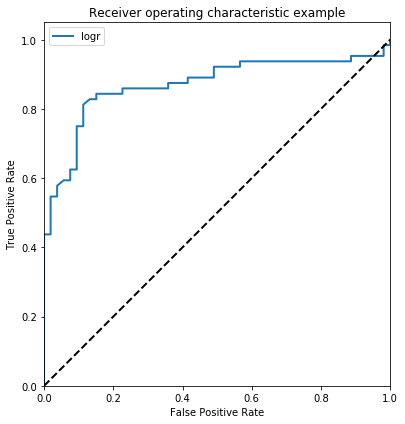

In [563]:
curves = [(fpr_logr,tpr_logr,'logr')]
plot_roc(curves);

plt.tight_layout()
plt.savefig('../slides/eods-06-model-evaluation/images/roc_curve_01.png')

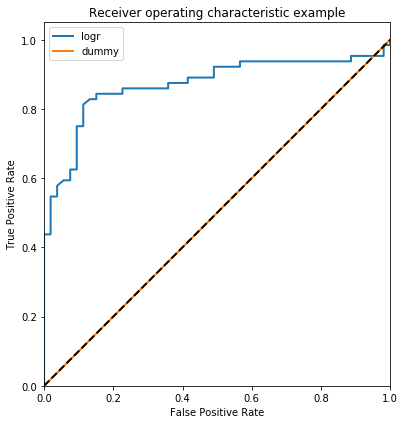

In [564]:
y_pred_dummy = dc.predict_proba(X_train)

fpr_dummy, tpr_dummy, _ = roc_curve(y_train, y_pred_dummy[:,1])

curves.append((fpr_dummy,tpr_dummy,'dummy'))
_ = plot_roc(curves)

plt.tight_layout()
plt.savefig('../slides/eods-06-model-evaluation/images/roc_curve_02.png')

/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 15}


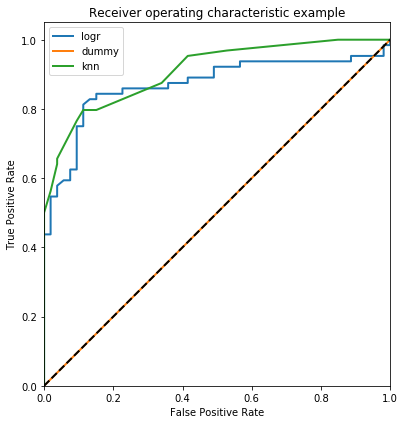

In [565]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':[3,5,15,20]}
gs_knn = GridSearchCV(KNeighborsClassifier(),params,cv=5,scoring='f1')
gs_knn.fit(X_train,y_train)
y_pred_knn = gs_knn.predict_proba(X_train)
print(gs_knn.best_params_)

fpr_knn, tpr_knn, _ = roc_curve(y_train, y_pred_knn[:,1])

curves.append((fpr_knn,tpr_knn,'knn'))
_ = plot_roc(curves)

plt.tight_layout()
plt.savefig('../slides/eods-06-model-evaluation/images/roc_curve_03.png')

In [566]:
from sklearn.metrics import auc

In [569]:
from sklearn.metrics import roc_auc_score

In [570]:
for name,model in [('dummy',dc),('logr',logr),('knn',knn)]:
    y_pred = model.predict_proba(X_train)
    auc = roc_auc_score(y_train,y_pred[:,1])
    print('{:5s} auc = {:0.3f}'.format(name,auc))

dummy auc = 0.500
logr  auc = 0.871
knn   auc = 0.942


In [568]:
knn.score(X_test,y_test)

0.6923076923076923

---

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
tips.loc[tips.total_bill < 5]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1


In [71]:
tips[tips.total_bill < 5]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1


In [72]:
tips.loc[:,'total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [73]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [74]:
tips[tips.total_bill < 5, 'total_bill']

TypeError: '(0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: total_bill, Length: 244, dtype: bool, 'total_bill')' is an invalid key

In [75]:
tips.loc[tips.total_bill < 5, 'total_bill']

67    3.07
Name: total_bill, dtype: float64